In [1]:
import numpy as np
from util.whatwhere.encoder import *
from util.whatwhere.decoder import *
from util.whatwhere.plot import *
from util.willshaw.memory import *
from util.mnist.tools import *
from util.willshaw.plot import *
from util.pickleInterface import *
from util.pytorch.tools import np_to_grid
import wandb
from util.kldiv import *
from tqdm import trange

rng = np.random.RandomState(0)  # reproducible
K = 20
Q = 21
n_epochs = 5
b = 0.8
wta = True

In [2]:
from scipy.sparse import csr_matrix

In [3]:
Fs = 2
Tw = 0.75

In [4]:
imgs, lbls, _, _ = read_mnist(n_train=60000)

In [5]:
features = compute_features(imgs, lbls, K, Fs, rng, n_epochs, b)

In [6]:
codes, _ = compute_codes(
            imgs,
            K,
            Q,
            features,
            Tw,
            wta,
            n_epochs,
            b,
            Fs,
            set="trn",
        )
code_size = codes.shape[1]

In [7]:
ex_idxs = idxs_x_random_per_class(lbls[:code_size])

In [8]:
from util.plot import multiple_imshow

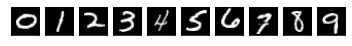

In [9]:
multiple_imshow(imgs[ex_idxs], layout=(1,10))

In [10]:
def avg_bits_per_code(codes):
    nnz = codes.nnz
    n_codes = codes.shape[0]
    return nnz / n_codes

In [11]:
avg_bits_per_code(codes)

79.6163

In [12]:
imgs.shape

(60000, 28, 28)

In [13]:
from util.whatwhere.naive_baseline import *

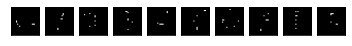

In [14]:
n1 = naive_encode1(imgs, 7)
multiple_imshow(n1[ex_idxs].toarray().reshape(-1,28,28), layout=(1,10))

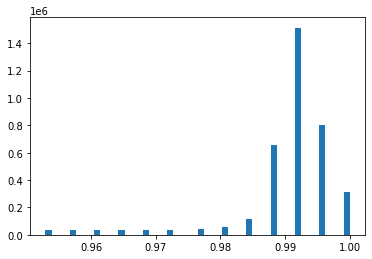

In [15]:
_ = plt.hist(imgs[imgs>0.95].reshape(-1), bins=50)

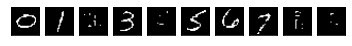

In [17]:
n2 = naive_encode2(imgs, 0.99)
multiple_imshow(n2[ex_idxs].toarray().reshape(-1,28,28), layout=(1,10))